In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pip install openpyxl

In [21]:

data = pd.read_csv('/kaggle/input/coffe-sales/index.csv')

In [22]:
print(data.head())
print(data.info())


         date                 datetime cash_type                 card  money  \
0  2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3  2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4  2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

     coffee_name  
0          Latte  
1  Hot Chocolate  
2  Hot Chocolate  
3      Americano  
4          Latte  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1830 non-null   object 
 1   datetime     1830 non-null   object 
 2   cash_type    1830 non-null   object 
 3   card         1741 non-null   object 
 4   money        1830 non-null   float64
 5   

In [23]:
print(data.isnull().sum())

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64


In [24]:
data['cash_type'] = data['cash_type'].fillna('Unknown')

In [ ]:
Convert Date and Time: Combine date and datetime columns into a proper datetime format for analysis.

In [25]:
print(data.dtypes)

date            object
datetime        object
cash_type       object
card            object
money          float64
coffee_name     object
dtype: object


In [26]:
data.describe()



,money
count,1830.000000
mean,31.551049
std,5.289504
min,18.120000
25%,27.920000
50%,32.820000
75%,35.760000
max,40.000000


In [28]:
data['money'] = data['money'].astype('int')


In [30]:
data['money'].dtype

dtype('int64')

In [32]:
data.columns

Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name'], dtype='object')

This code creates a bar plot using Seaborn (sns.countplot) to visualize the count of occurrences for each unique value in the coffee_name column of a DataFrame (df). The plot is customized to adjust the figure size and display the count labels on top of each bar.

Let’s break it down:

mc = sns.countplot(x='coffee_name', data=df):

sns.countplot: A Seaborn function that creates a bar plot displaying the count of unique values for a specified column.
x='coffee_name': Specifies that the x-axis should represent the coffee_name column from the DataFrame (df). This column likely contains the names of different coffee types.
data=df: The DataFrame df contains the data being visualized. In this case, it's assumed to have a column called coffee_name.
plt.rcParams['figure.figsize'] = (12, 6):

This line adjusts the size of the entire plot figure. plt.rcParams is used to configure various parameters in Matplotlib.
figure.figsize = (12, 6): Sets the figure width to 12 units and height to 6 units. This is helpful if you want the plot to be larger or smaller based on your preference.
for bars in mc.containers::

This is the start of a loop that iterates over the bars in the plot.
mc.containers: In Seaborn, this stores the bars (rectangles) of the bar plot.
mc.bar_label(bars):

bar_label: This method adds labels on top of each bar to display the count.
bars: Refers to the individual bars created by mc.containers.
For each bar in the plot, the count value is displayed directly on top of it, making it easy to see the exact count.

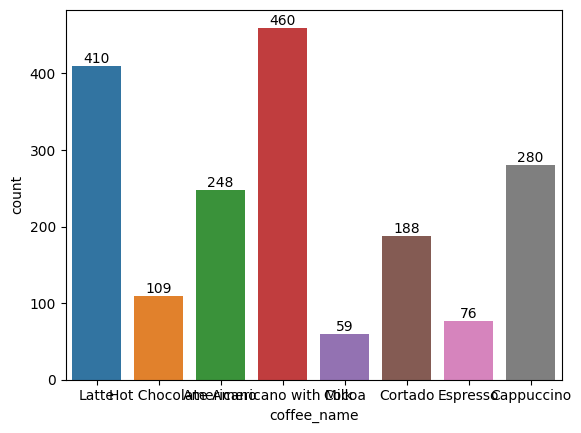

In [35]:
mc = sns.countplot(x = 'coffee_name', data = data)

plt.rcParams['figure.figsize'] = (12, 6)
for bars in mc.containers:
    mc.bar_label(bars)


In [ ]:
the above data shows the no.of count of coffe is been ordered 


This code creates a bar plot using Seaborn (sns.barplot) to visualize the total money spent (or earned) for each type of coffee (coffee_name) from a DataFrame (df). The plot shows how much money was made from each coffee type, sorted in descending order by the amount of money.

Let’s break it down step by step:

cm = df.groupby(['coffee_name'], as_index=False)['money'].sum():

df.groupby(['coffee_name']): This groups the data by the coffee_name column, so all rows corresponding to the same coffee name are combined together.
as_index=False: Ensures that coffee_name remains a regular column in the resulting DataFrame, rather than being set as the index.
['money'].sum(): For each group of coffee names, this sums up the values in the money column. This likely represents the total sales or revenue for each type of coffee.
The result is a DataFrame cm with each coffee name and the corresponding total money associated with it.
.sort_values(by='money', ascending=False):

This sorts the resulting DataFrame cm by the money column, in descending order (from highest to lowest).
This ensures that the coffee types with the highest total sales (or revenue) are listed first.
sns.barplot(x='coffee_name', y='money', data=cm):

sns.barplot: A Seaborn function that creates a bar plot, where the height of each bar corresponds to the value of the y variable.
x='coffee_name': The coffee_name column is plotted on the x-axis. Each unique coffee type will have its own bar.
y='money': The money column is plotted on the y-axis, representing the total sales or revenue for each coffee type.
data=cm: Specifies that the data source for the plot is the sorted DataFrame cm.

<Axes: xlabel='coffee_name', ylabel='money'>

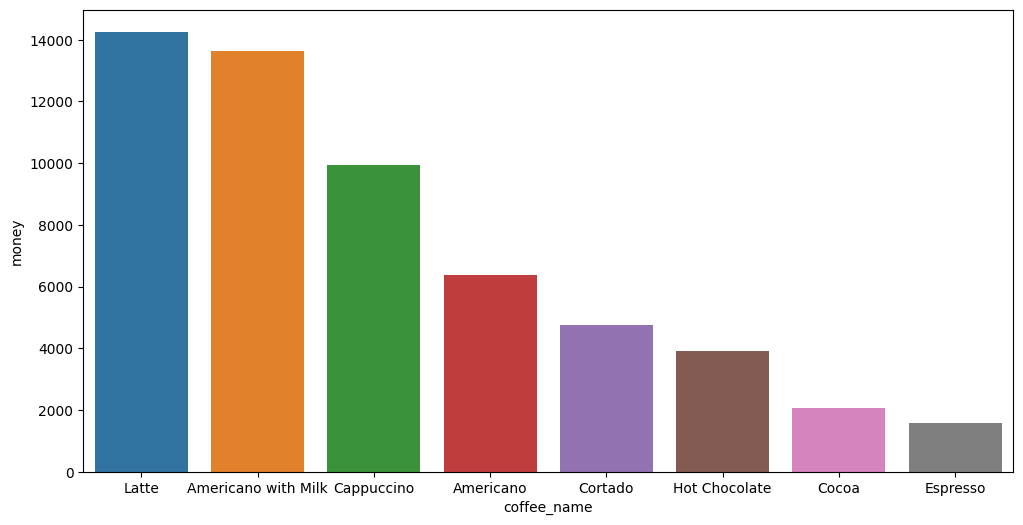

In [36]:
cm = data.groupby(['coffee_name'], as_index = False)['money'].sum().sort_values(by = 'money', ascending = False)
sns.barplot(x = 'coffee_name', y = 'money', data = cm)


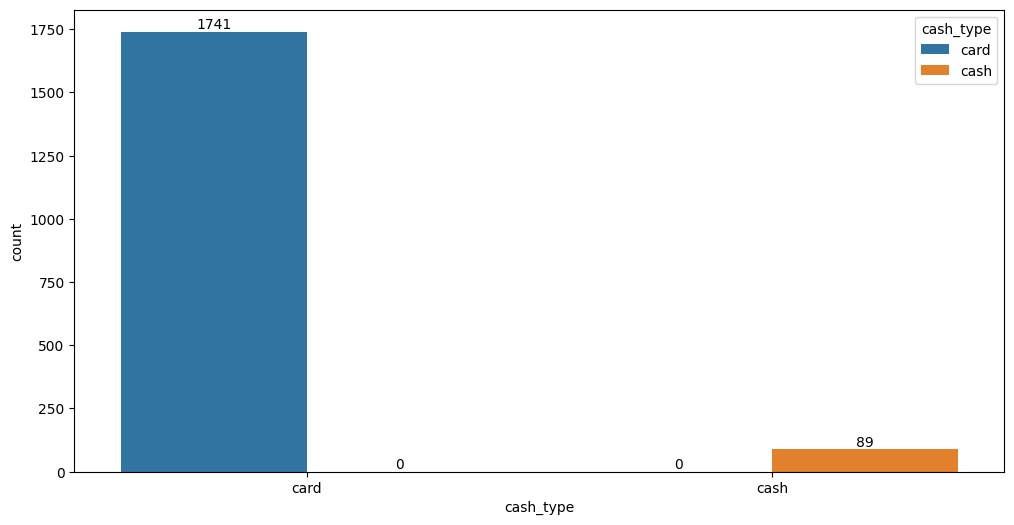

In [37]:
cs = sns.countplot(x = 'cash_type', data = data, hue = 'cash_type')
plt.rcParams['figure.figsize'] = (3, 5)

for bars in cs.containers:
    cs.bar_label(bars)

the above data describe that most of the payment for coffe is done from card type

In [38]:
data.groupby(['cash_type'],as_index=False)['money'].sum().sort_values(by = 'money', ascending = False)

,cash_type,money
0,card,53330
1,cash,3186


the above result show that the money generated from the card is way more than cash payment